## Analise de medidas de variabilidade e medidas resumo

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


In [80]:
df = pd.read_excel("base_musical.xlsx")
df = df.drop(columns='Unnamed: 0')
df = df.rename(columns={'tempo': 'BPM'})

In [81]:
df

,artista,musica,dancabilidade,energia,chave,volume,presenca_palavras,acustica,instrumentalidade,ao_vivo,positividade,BPM,duracao_ms,genero
0,Harry Styles,As It Was,0.520,0.731,6,-5.338,0.0557,0.342000,0.001010,0.3110,0.662,173.930,167303,pop
1,"Bizarrap, Quevedo","Quevedo: Bzrp Music Sessions, Vol. 52",0.621,0.782,2,-5.548,0.0440,0.012500,0.033000,0.2300,0.550,128.033,198938,"argentine hip hop, pop venezolano, trap argent..."
2,"Bad Bunny, Chencho Corleone",Me Porto Bonito,0.911,0.712,1,-5.105,0.0817,0.090100,0.000027,0.0933,0.425,92.005,178567,"latin, reggaeton, trap latino,"
3,Bad Bunny,Tití Me Preguntó,0.650,0.715,5,-5.198,0.2530,0.099300,0.000291,0.1260,0.187,106.672,243717,"latin, reggaeton, trap latino"
4,BLACKPINK,Pink Venom,0.798,0.697,0,-7.139,0.0891,0.020200,0.000000,0.2590,0.745,90.031,186964,"k-pop, k-pop girl group"
5,Manuel Turizo,La Bachata,0.835,0.679,7,-5.329,0.0364,0.583000,0.000002,0.2180,0.850,124.980,162638,"colombian pop, latin, reggaeton, reggaeton col..."
6,ROSALÍA,DESPECHÁ,0.919,0.623,7,-6.521,0.0992,0.184000,0.000016,0.0609,0.775,130.037,157018,r&b en espanol
7,"David Guetta, Bebe Rexha",I'm Good (Blue),0.561,0.965,7,-3.673,0.0343,0.003830,0.000007,0.3710,0.304,128.040,175238,"big room, dance pop, edm, pop, pop dance, pop ..."
8,OneRepublic,I Ain't Worried,0.704,0.797,0,-5.927,0.0475,0.082600,0.000745,0.0546,0.825,139.994,148486,"dance pop, piano rock, pop, pop rock"
9,Bad Bunny,Efecto,0.801,0.475,7,-8.797,0.0516,0.141000,0.000017,0.0639,0.234,98.047,213061,"latin, reggaeton, trap latino"


In [82]:
def lista_simples(lista):
    if isinstance(lista, list):
        return [sub_elem for elem in lista for sub_elem in lista_simples(elem)]
    else:
        return [lista]

def contar(variavel):
    lista_artistas = list(df[variavel])
    artista2 = []
    lista_certa = []
    for artista in lista_artistas:
        if type(artista) == float:
            continue
        if "," in artista:
            artista2.append(artista.split(", "))
        else:
            lista_certa.append(artista)

    artistas2 = lista_simples(artista2)

    for elem in artistas2:
        lista_certa.append(elem)
    dctArtistas = {}
    for artista in lista_certa:
        dctArtistas.update({artista: lista_certa.count(artista)})
    return dctArtistas  

In [83]:
dctContar = contar('genero')
dctContar

{'pop': 24,
 'r&b en espanol': 2,
 'viral pop': 2,
 'afrofuturism': 1,
 'drill brasileiro': 1,
 'argentine hip hop': 1,
 'pop venezolano': 1,
 'trap argentino': 1,
 'rap canario': 1,
 'trap latino': 18,
 'latin': 14,
 'reggaeton': 16,
 '': 5,
 'k-pop': 2,
 'k-pop girl group': 1,
 'colombian pop': 2,
 'reggaeton colombiano': 3,
 'big room': 1,
 'dance pop': 13,
 'edm': 2,
 'pop dance': 2,
 'pop rap': 2,
 'electropop': 1,
 'post-teen pop': 3,
 'uk pop': 4,
 'piano rock': 4,
 'pop rock': 1,
 'r&b': 1,
 'art pop': 1,
 'art rock': 1,
 'baroque pop': 1,
 'new wave pop': 1,
 'permanent wave': 2,
 'singer-songwriter': 1,
 'cumbia': 1,
 'latin alternative': 1,
 'pop electronico': 1,
 'tropical alternativo': 1,
 'hip pop': 1,
 'queens hip hop': 1,
 'rap': 4,
 'gauze pop': 1,
 'indietronica': 1,
 'shiver pop': 1,
 'australian hip hop': 1,
 'canadian pop': 5,
 'chill pop': 1,
 'k-pop boy group': 1,
 'gen z singer-songwriter': 1,
 'dfw rap': 1,
 'melodic rap': 1,
 'escape room': 1,
 'minnesota hip 

In [84]:
dfVariaveis = df[['artista', 'musica', 'dancabilidade', 'ao_vivo', 'duracao_ms', 'chave', 'energia', 'positividade']]
dfVariaveis['duracao_ms'] = dfVariaveis['duracao_ms'] / 60000
dfVariaveis = dfVariaveis.rename(columns={'duracao_ms': 'duracao'})
# dfVariaveis.to_excel("variaveis.xlsx")

C:\Users\juju_\AppData\Local\Temp\ipykernel_6736\2154228972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfVariaveis['duracao_ms'] = dfVariaveis['duracao_ms'] / 60000


In [85]:
media = df.mean(numeric_only=True)
mediana = df.median(numeric_only=True)
variancia = df.var(numeric_only=True)
dp = df.std(numeric_only=True)
coeficiente_variacao = dp / media

dfEstatisticas = df.describe()
dfEstatisticas.loc['mediana'] = mediana
dfEstatisticas.loc['variancia'] = variancia
dfEstatisticas.loc['coeficiente_variacao'] = dfEstatisticas.loc['std'] / dfEstatisticas.loc['mean']

In [86]:
dfEstatisticas.to_excel("estatisticas.xlsx")

## Gráficos

array([[<AxesSubplot:title={'center':'dancabilidade'}>,
        <AxesSubplot:title={'center':'energia'}>,
        <AxesSubplot:title={'center':'chave'}>],
       [<AxesSubplot:title={'center':'volume'}>,
        <AxesSubplot:title={'center':'presenca_palavras'}>,
        <AxesSubplot:title={'center':'acustica'}>],
       [<AxesSubplot:title={'center':'instrumentalidade'}>,
        <AxesSubplot:title={'center':'ao_vivo'}>,
        <AxesSubplot:title={'center':'positividade'}>],
       [<AxesSubplot:title={'center':'BPM'}>,
        <AxesSubplot:title={'center':'duracao_ms'}>, <AxesSubplot:>]],
      dtype=object)

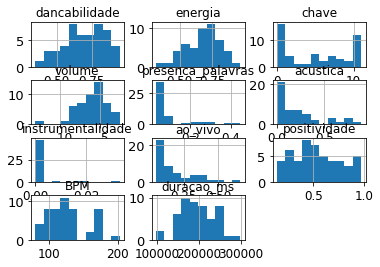

In [87]:
df.hist() 

<AxesSubplot:>

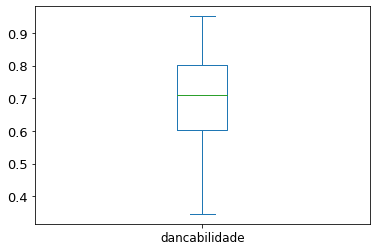

In [88]:
df['dancabilidade'].plot(kind = 'box')

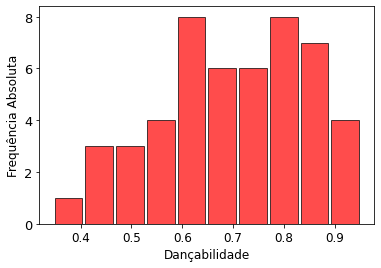

In [89]:
plt.hist(df['dancabilidade'],  rwidth=0.9, color='red', alpha=0.7, edgecolor='black', )
plt.xlabel('Dançabilidade')
plt.ylabel('Frequência Absoluta')
# plt.subplots(figsize =(10, 7))
plt.show()

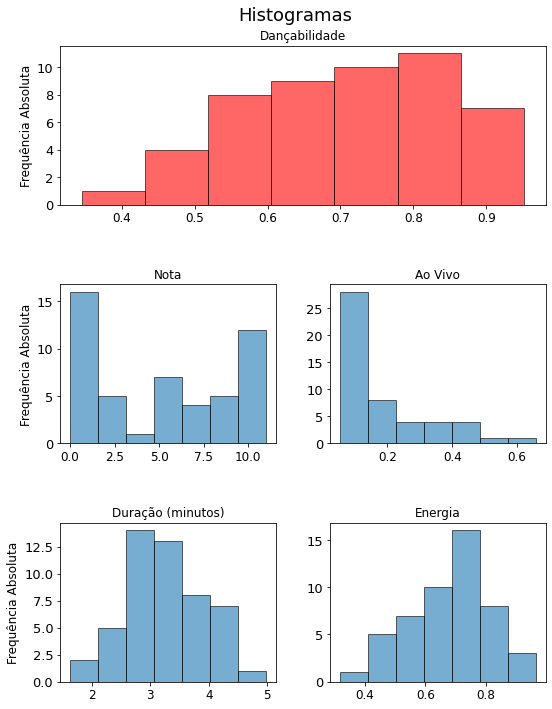

In [90]:
fig = plt.gcf()
fig.set_size_inches(8.7,11.7)
# fig.set_size_inches(8.3,15.7)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=13
plt.rcParams['axes.labelsize']=12
fig.text(
    x=0.5,
    y=0.91,
    s='Histogramas',
    fontsize = 18,
    horizontalalignment='center',
    color='black')
gs = gridspec.GridSpec(3, 2, hspace=0.5,wspace=0.25)
#SIN
plt.subplot(gs[0, :])
plt.hist(dfVariaveis['dancabilidade'], bins=7, color='red', alpha=0.6, edgecolor='black') # rwidth=0.9
plt.title("Dançabilidade")
plt.ylabel('Frequência Absoluta')

# plt.grid(True)
# plt.legend(loc='upper center', fontsize=11)

# plt.annotate(
#     'teste',
#     xy=(mes,new_sin_load),
#     color='#143c5a',
#     fontsize = 10,
#     xytext=(0,-20),
#     textcoords='offset points'
# )
# for i, row in last_sin_load['antiga'].iterrows():
#     plt.annotate(
#         str(row['CARGA ANTIGA']),
#         xy=(row['DATA'],row['CARGA ANTIGA']),
#         color='#2fb3c3',
#         fontsize = 10,
#         xytext=(0,10),
#         textcoords='offset points'
#     )

plt.subplot(gs[1,0])
plt.hist(dfVariaveis['chave'], bins=7, alpha=0.6, edgecolor='black')
plt.title('Nota')
plt.ylabel('Frequência Absoluta')

# plt.subplot(gs[1,0])
# plt.hist(dfVariaveis['BPM'], bins=7, alpha=0.6, edgecolor='black')
# plt.title('BPM (Batidas Por Minuto)')

plt.subplot(gs[1,1])
plt.hist(dfVariaveis['ao_vivo'], bins=7, alpha=0.6, edgecolor='black')
plt.title('Ao Vivo')
# plt.ylabel('Frequência Absoluta')


plt.subplot(gs[2,0])
plt.hist(dfVariaveis['duracao'], bins=7, alpha=0.6, edgecolor='black')
plt.title('Duração (minutos)')
plt.ylabel('Frequência Absoluta')

plt.subplot(gs[2,1])
plt.hist(dfVariaveis['energia'], bins=7, alpha=0.6, edgecolor='black')
plt.title('Energia')
# plt.ylabel('Frequência Absoluta')

# plt.subplot(gs[3,0])
# plt.hist(dfVariaveis['positividade'], bins=7, alpha=0.6, edgecolor='black')
# plt.title('Positividade')



# plt.savefig('graficos.png', format='png')
plt.show()




In [91]:
import numpy as np
p25, p50, p75 = np.percentile(df['dancabilidade'], [25, 50, 75])

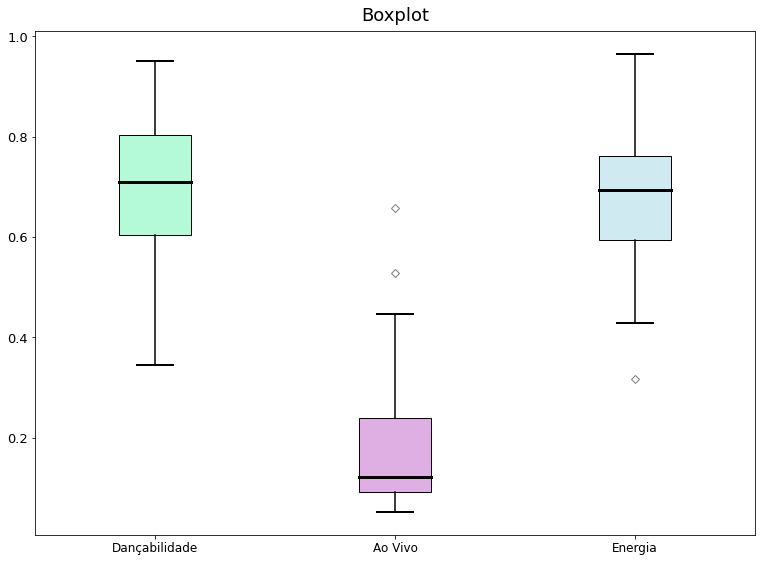

In [92]:
# Creating dataset
data = [df['dancabilidade'], df['ao_vivo'], df['energia']]

fig = plt.figure(figsize =(10, 7))

fig.text(x=1.5,
    y=1.02, 
    s="Boxplot",
    fontsize = 18,
    horizontalalignment='center',
    color='black')
 
# Creating axes instance
ax = fig.add_axes([1, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, labels=['Dançabilidade', 'Ao Vivo', 'Energia'], patch_artist=True)

colors = ['#B4FAD8', '#DFAFE3',  
          '#D0EAF2'] 
  
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color) 
for whisker in bp['whiskers']: 
    whisker.set(color ='#000000', 
                linewidth = 1.5)
for cap in bp['caps']: 
    cap.set(color ='black', 
            linewidth = 2) 
for median in bp['medians']: 
    median.set(color ='black', 
               linewidth = 3) 
for flier in bp['fliers']: 
    flier.set(marker ='D', 
              color ='black', 
              alpha = 0.5) 
 

# show plot
plt.show()

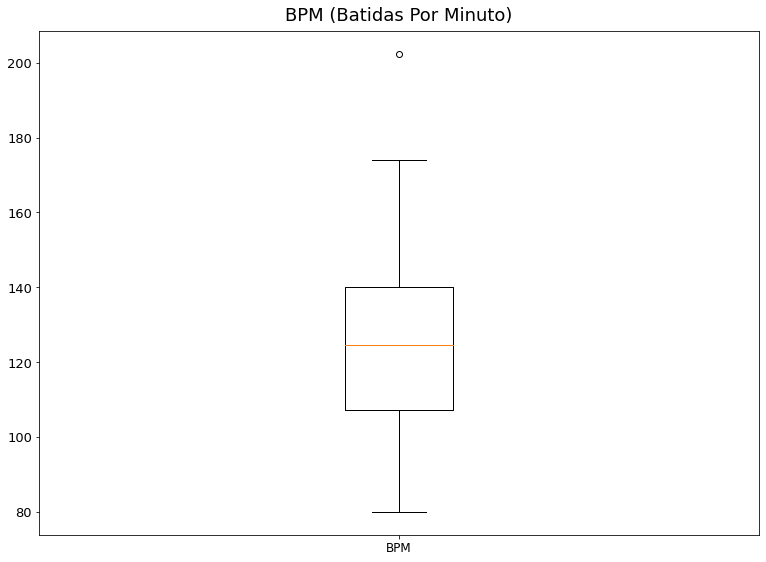

In [93]:
data = [df['BPM']]

fig = plt.figure(figsize =(10, 7))

fig.text(x=1.5,
    y=1.02, 
    s="BPM (Batidas Por Minuto)",
    fontsize = 18,
    horizontalalignment='center',
    color='black')
 
# Creating axes instance
ax = fig.add_axes([1, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, labels=['BPM'] )
 

# show plot
plt.show()

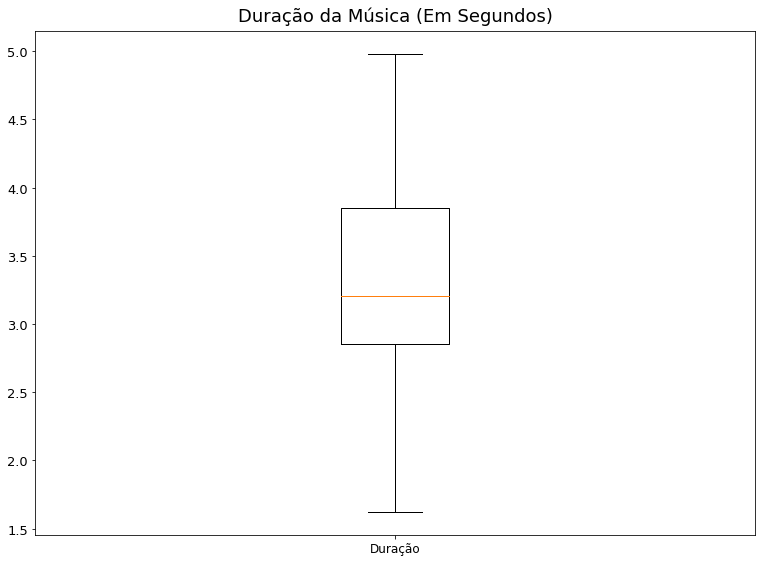

In [94]:
data = [dfVariaveis['duracao']]

fig = plt.figure(figsize =(10, 7))

fig.text(x=1.5,
    y=1.02, 
    s="Duração da Música (Em Segundos)",
    fontsize = 18,
    horizontalalignment='center',
    color='black')
 
# Creating axes instance
ax = fig.add_axes([1, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, labels=['Duração'] )
 

# show plot
plt.show()

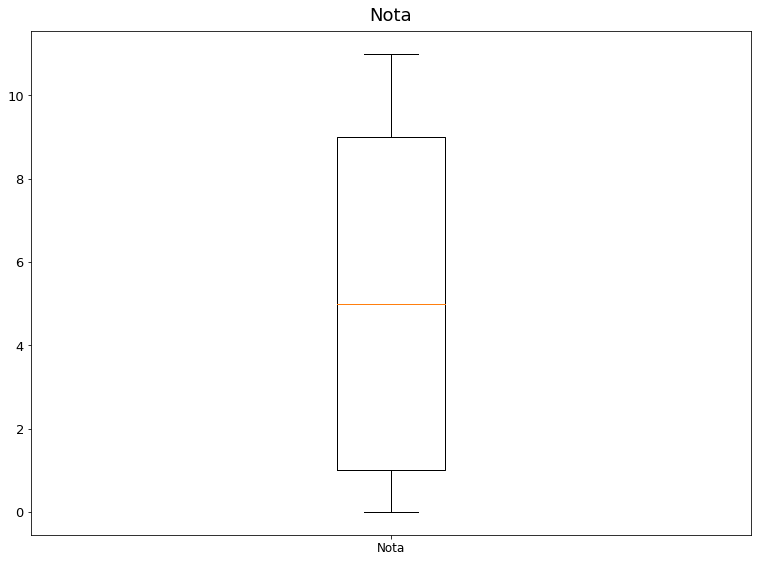

In [95]:
data = [dfVariaveis['chave']]

fig = plt.figure(figsize =(10, 7))

fig.text(x=1.5,
    y=1.02, 
    s="Nota",
    fontsize = 18,
    horizontalalignment='center',
    color='black')
 
# Creating axes instance
ax = fig.add_axes([1, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, labels=['Nota'] )
 

# show plot
plt.show()

In [202]:
dfTeste = dfVariaveis[['duracao']]
dfTeste['color'] = None
dfTeste.loc[dfTeste['duracao'] < 2, color] = 'red'
dfTeste.loc[(dfTeste['duracao'] > 2) & (dfTeste['duracao'] < 2.7), color] = 'orange'
dfTeste.loc[(dfTeste['duracao'] > 2.7) & (dfTeste['duracao'] < 3.15), color] = 'magenta'
dfTeste.loc[(dfTeste['duracao'] > 3.15) & (dfTeste['duracao'] < 3.7), color] = 'purple'
dfTeste.loc[(dfTeste['duracao'] > 3.7) & (dfTeste['duracao'] < 4.2), color] = 'cyan'
dfTeste.loc[(dfTeste['duracao'] > 4.2) & (dfTeste['duracao'] < 4.5), color] = 'blue'
dfTeste.loc[dfTeste['duracao'] > 4.5, color] = 'green'
cores = list(dfTeste['#D0EAF2'])

C:\Users\juju_\AppData\Local\Temp\ipykernel_6736\2467919354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTeste['color'] = None
C:\Users\juju_\AppData\Local\Temp\ipykernel_6736\2467919354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTeste.loc[dfTeste['duracao'] < 2, color] = 'red'


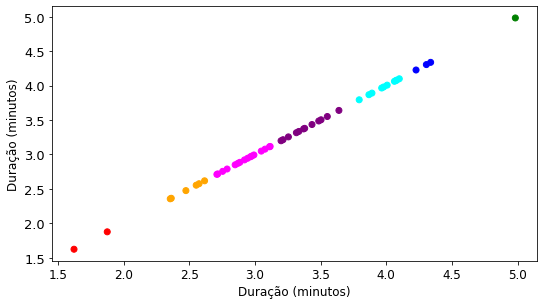

In [203]:
fig = plt.gcf()
fig.set_size_inches(8.7,11.7)
# fig.set_size_inches(8.3,15.7)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=13
plt.rcParams['axes.labelsize']=12
# fig.text(
#     x=0.5,
#     y=0.91,
#     s='Dispersão',
#     fontsize = 18,
#     horizontalalignment='center',
#     color='black')
gs = gridspec.GridSpec(2, 2, hspace=0.5,wspace=0.25)
plt.subplot(gs[0, :])
colors = np.array(cores)
plt.scatter(dfVariaveis['duracao'], dfVariaveis['duracao'], c=colors)
plt.xlabel("Duração (minutos)")
plt.ylabel("Duração (minutos)")
plt.show()

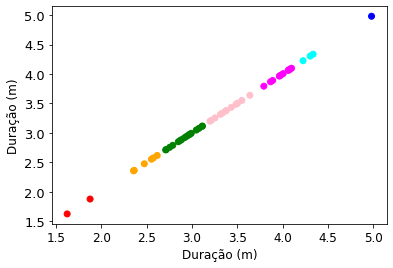

In [193]:
colors = np.array(cores)
plt.scatter(dfVariaveis['duracao'], dfVariaveis['duracao'], c=colors)
plt.xlabel("Duração (m)")
plt.ylabel("Duração (m)")
plt.show()
